MULTILINEAR REGRESSION FRAMEWORK FOR TRAIN/TEST

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, datasets, linear_model
from sklearn.model_selection import train_test_split, KFold


In [2]:
training = pd.read_csv('../data/train_clean.csv', index_col=0)
training.shape

(1437, 17)

In [3]:
#Convert year building was builtinto a numeric Age 
training['Age'] = 2019 - training['YearBuilt']


In [4]:
# normalizes dataframes using preprocessing from sklearn

def make_normal(df):
    new_dict = {}
    cols = df.columns
    for name in cols: 
        key = 'norm_' + name
        arr = np.array(df[name])
        value = preprocessing.normalize([arr])      
        new_dict[key] = value[0]
        ind = range(df.shape[0]-1) 
    return pd.DataFrame(new_dict)
    

In [5]:
# Make continuous features normal. Return normed df
norm_list = ['LotArea', 'Age', 'GrLivArea', 'GarageArea']
norm_df = training[norm_list]

norm_df = make_normal(norm_df)

In [6]:
# Mutates main df. Drops un-normed continuous values
training = training.drop(norm_list, axis=1)

In [7]:
# Mutates main df. Removes ordinal years. Keeps as subset
years_df = training[['YearBuilt', 'YearRemodAdd']]
training = training.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

In [8]:
# Mutates main df. Adds normed values
training = pd.concat([training, norm_df], axis = 1)

In [9]:
training.sample(5) # for inspection. This df will be used for training/testing

,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,GarageType,SalePrice,Kitchen,Fireplace,ExterQ,BsmtQ,HeatingQ,n_toilets,n_showers,norm_LotArea,norm_Age,norm_GrLivArea,norm_GarageArea
430,0.0,3.0,1.0,1.0,181000.0,3.0,3.0,3.0,4.0,5.0,3.0,2.0,0.010423,0.049756,0.009025,0.017988
280,0.0,3.0,1.0,1.0,244600.0,4.0,4.0,4.0,4.0,5.0,2.0,2.0,0.010353,0.006102,0.016255,0.026981
817,0.0,3.0,1.0,1.0,232600.0,4.0,4.0,4.0,4.0,5.0,2.0,2.0,0.019179,0.027225,0.014877,0.023302
640,1.0,3.0,1.0,1.0,143250.0,3.0,0.0,3.0,3.0,3.0,3.0,2.0,0.025133,0.053042,0.019103,0.011038
24,1.0,3.0,1.0,1.0,154000.0,4.0,3.0,3.0,3.0,5.0,2.0,2.0,0.020082,0.023939,0.022471,0.013797


In [10]:
norm_list = ['norm_'+x for x in norm_list]

In [11]:
training.shape

(1450, 16)

In [12]:
training = training.dropna()
training.shape

(1424, 16)

In [13]:
# Remove "SalePrice column from train_x"
train_y = training['SalePrice'] 
train_x = training.drop('SalePrice', axis=1)

In [14]:
# Split Training data 



BsmtFullBath       0
BedroomAbvGr       0
KitchenAbvGr       0
GarageType         0
Kitchen            0
Fireplace          0
ExterQ             0
BsmtQ              0
HeatingQ           0
n_toilets          0
n_showers          0
norm_LotArea       0
norm_Age           0
norm_GrLivArea     0
norm_GarageArea    0
dtype: int64

In [15]:
#Multilinear - Simple -- Unpenalized model i.e. lambda = 0
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(train_x, train_y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(train_x, train_y)))

Intercept: -161410.547310
Coefficients: [  -5960.73958637    9613.90726685   -6179.47749914   -3420.25981561
   23663.43559291    9143.06749581   35603.71297442   13084.35281478
    1034.82355445   11307.75085226   16050.51738475   50920.55313945
  -50415.82636795  -18965.2376629  -126982.39855108]
R^2: 0.704101


In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

LASSO REGRESSION / COEFFICIENT ESTIMATES AT DIFFERENT ALPHA LEVELS

In [17]:
lasso  = Lasso()
alphas = np.linspace(0.1,0.9,20)
lasso.set_params(normalize=False)
coefs_lasso  = []
intercepts_lasso = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(train_x, train_y)  
    coefs_lasso.append(lasso.coef_)
    intercepts_lasso.append(lasso.intercept_)
        
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = train_x.columns)  
coefs_lasso.head(10)

,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,GarageType,Kitchen,Fireplace,ExterQ,BsmtQ,HeatingQ,n_toilets,n_showers,norm_LotArea,norm_Age,norm_GrLivArea,norm_GarageArea
0.100000,-5962.606580,9613.823485,-6177.920441,-3415.865075,23665.312539,9142.102820,35601.014732,13085.742607,1034.735890,11312.648547,16044.667717,49088.580013,-48958.776253,-17119.758075,-125420.817092
0.142105,-5963.393155,9613.788788,-6177.265578,-3414.015944,23666.102923,9141.696770,35599.878728,13086.328270,1034.698860,11314.707578,16042.207595,48317.237769,-48345.289026,-16342.723751,-124763.318741
0.184211,-5964.182491,9613.751990,-6176.612983,-3412.163833,23666.893510,9141.290306,35598.742578,13086.911763,1034.661276,11316.772997,16039.744481,47545.862443,-47731.778249,-15565.668425,-124105.795141
0.226316,-5964.968556,9613.718278,-6175.957925,-3410.316396,23667.683891,9140.884460,35597.606679,13087.498373,1034.624331,11318.828140,16037.287083,46774.539383,-47118.302754,-14788.646459,-123448.310342
0.268421,-5965.757893,9613.681481,-6175.305331,-3408.464285,23668.474479,9140.477997,35596.470529,13088.081866,1034.586748,11320.893561,16034.823967,46003.164049,-46504.791971,-14011.591127,-122790.786736
0.310526,-5966.547230,9613.644683,-6174.652737,-3406.612174,23669.265066,9140.071534,35595.334379,13088.665359,1034.549164,11322.958981,16032.360852,45231.788715,-45891.281189,-13234.535795,-122133.263130
0.352632,-5967.333051,9613.612310,-6173.997911,-3404.767209,23670.055500,9139.665970,35594.198643,13089.253215,1034.512237,11325.008332,16029.907911,44460.493817,-45277.822026,-12457.532049,-121475.797721
0.394737,-5968.122388,9613.575512,-6173.345317,-3402.915097,23670.846087,9139.259507,35593.062492,13089.836708,1034.474654,11327.073755,16027.444794,43689.118471,-44664.311236,-11680.476710,-120818.274107
0.436842,-5968.911726,9613.538713,-6172.692722,-3401.062985,23671.636675,9138.853043,35591.926342,13090.420201,1034.437070,11329.139178,16024.981676,42917.743125,-44050.800447,-10903.421371,-120160.750493
0.478947,-5969.701063,9613.501915,-6172.040128,-3399.210873,23672.427262,9138.446580,35590.790192,13091.003693,1034.399486,11331.204601,16022.518559,42146.367780,-43437.289657,-10126.366031,-119503.226879


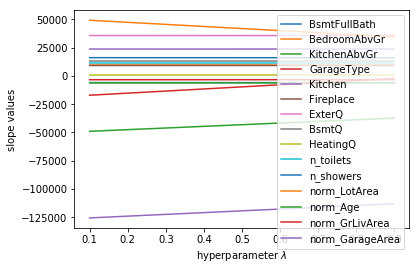

In [18]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

plt.legend()   

In [19]:
ridge = Ridge() # create a ridge regression instance
ridge.set_params(normalize=False)
ridge.fit(train_x, train_y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients
print("The coef of determination of ridge regression is: %.4f" %ridge.score(train_x, train_y))

The coef of determination of ridge regression is: 0.7039


In [20]:
ridge_scores_train = []
lasso_scores_train = []
#ridge_scores_test  = []
#lasso_scores_test  = []

alphas = np.logspace(-2, 3, 10)

for alpha in alphas:
    ridge.set_params(alpha=alpha, normalize=False)
    lasso.set_params(alpha=alpha, normalize=False)
    ridge.fit(train_x, train_y)
    lasso.fit(train_x, train_y)
    print(ridge.score(train_x,train_y))
    ridge_scores_train.append(ridge.score(train_x, train_y))
    #ridge_scores_test.append(ridge.score(X_test, Y_test))
    lasso_scores_train.append(lasso.score(train_x, train_y))
    #lasso_scores_test.append(lasso.score(X_test, Y_test))
    
ridge_scores_train = np.array(ridge_scores_train) 
#ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
#lasso_scores_test  = np.array(lasso_scores_test)

0.7040984967271039
0.7040819901375721
0.7040225953689689
0.7039423505650568
0.7038906616821945
0.7038499002791114
0.703620137063512
0.7017343992864756
0.6909129204279516
0.6496844964263456


array([0.7040985 , 0.70408199, 0.7040226 , 0.70394235, 0.70389066,
       0.7038499 , 0.70362014, 0.7017344 , 0.69091292, 0.6496845 ])

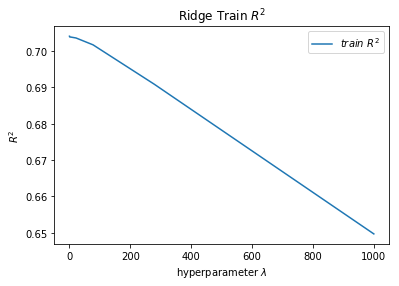

In [21]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
#plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train $R^2$')
#ridge_underfit = ridge_scores_train < ridge_scores_test
#last_underfit  = np.max(alphas[ridge_underfit])
#plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
ridge_scores_train

Text(0,0.5,'$R^2$')

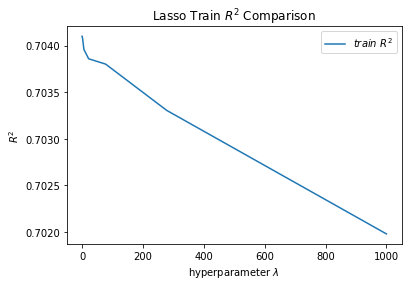

In [22]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
#plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train $R^2$ Comparison')
#lasso_underfit = lasso_scores_train < lasso_scores_test
#last_underfit  = np.max(alphas[lasso_underfit])
#plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [23]:
lasso_scores_train

array([0.70410087, 0.70410086, 0.70410068, 0.70409844, 0.7040751 ,
       0.7039592 , 0.70385885, 0.70380161, 0.70330464, 0.70197924])

In [24]:
ridge_scores_train

array([0.7040985 , 0.70408199, 0.7040226 , 0.70394235, 0.70389066,
       0.7038499 , 0.70362014, 0.7017344 , 0.69091292, 0.6496845 ])